In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import matplotlib.pyplot as plt

In [3]:
import os
import PIL
from PIL import Image
import pathlib

In [4]:
from pathlib import Path

In [5]:
side_len = 128

In [6]:
train_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z16',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z16',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26969 files belonging to 2 classes.
Using 21576 files for training.
Metal device set to: Apple M1


2022-06-09 19:43:27.362244: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-09 19:43:27.362391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 26969 files belonging to 2 classes.
Using 5393 files for validation.


2022-06-09 19:43:27.734657: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-09 19:43:27.734833: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


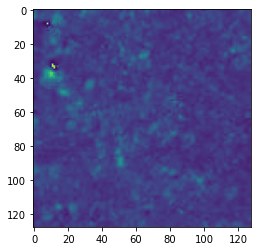

In [7]:
plt.imshow(np.squeeze(next(iter(valid_gen))[0][0]/255))

In [8]:
base_model = keras.applications.InceptionV3(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False) 

base_model.trainable = False

In [9]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

class Gray2VGGInput( Layer ) :
    
    """Custom conversion layer
    """
    def build( self, x ) :
        self.built = True
        return

    def call( self, x ) :
        rgb_x = K.concatenate( [x,x,x], axis=-1 )
        norm_x = rgb_x
        return norm_x

    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)

In [10]:
inputs          = keras.Input(shape=(side_len, side_len,1))
vgg_input_image = Gray2VGGInput( name='gray_to_rgb_norm')(inputs)
x               = vgg_input_image
scale_layer     = keras.layers.experimental.preprocessing.Rescaling(scale=1./255)

x = scale_layer(x)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.6)(x)
x = keras.layers.Dense(8, activation='relu')(x)
#x = GaussianNoise(0.01)(x)
x = keras.layers.GaussianDropout(0.1)(x)
outputs = keras.layers.Dense(1)(x)
model   = keras.Model(inputs, outputs)


In [11]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])



In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
gray_to_rgb_norm (Gray2VGGIn (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16392 

In [13]:
model.predict_generator(train_gen, steps=4)

/Users/malikagolshan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2022-06-09 19:43:30.195973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[ 0.06923959],
       [-0.5070632 ],
       [-0.10206437],
       [-0.02181377],
       [ 0.40338784],
       [ 0.35140902],
       [-0.7768878 ],
       [-0.09817258],
       [-0.56175125],
       [-0.58780116],
       [ 0.3756132 ],
       [ 0.16057736],
       [-0.81550837],
       [ 0.2882169 ],
       [-0.33725554],
       [ 0.45280868],
       [ 0.3933266 ],
       [ 0.6978136 ],
       [ 0.6840098 ],
       [-0.32923618],
       [-0.21863598],
       [ 0.30366617],
       [-0.47138143],
       [ 0.269814  ],
       [-0.14407986],
       [ 0.19631326],
       [ 0.07516863],
       [-0.3359861 ],
       [ 0.36111513],
       [ 0.36550936],
       [-0.57564414],
       [ 0.22938904],
       [-0.5943022 ],
       [ 0.5166664 ],
       [-0.00288201],
       [-0.14094466],
       [-1.2819555 ],
       [-0.27624956],
       [-0.2505973 ],
       [ 0.51851594],
       [ 0.33218405],
       [ 0.27133828],
       [ 0.90628594],
       [-0.4020499 ],
       [-0.7122058 ],
       [ 0

In [14]:
model.fit(train_gen, epochs=3, validation_data=valid_gen)

Epoch 1/3


2022-06-09 19:43:32.953567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - ETA: 0s - loss: 0.4888 - binary_accuracy: 0.7501

2022-06-09 19:45:01.568715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - 112s 163ms/step - loss: 0.4888 - binary_accuracy: 0.7501 - val_loss: 0.3826 - val_binary_accuracy: 0.8142
Epoch 2/3
675/675 [==============================] - 109s 161ms/step - loss: 0.4203 - binary_accuracy: 0.8006 - val_loss: 0.3704 - val_binary_accuracy: 0.8161
Epoch 3/3
675/675 [==============================] - 118s 175ms/step - loss: 0.4081 - binary_accuracy: 0.8060 - val_loss: 0.3825 - val_binary_accuracy: 0.7907


In [15]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(train_gen, epochs=3, validation_data=valid_gen)

Epoch 1/3


2022-06-09 19:51:37.082317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - ETA: 0s - loss: 0.0590 - binary_accuracy: 0.9743

2022-06-09 19:57:06.017695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


675/675 [==============================] - 354s 509ms/step - loss: 0.0590 - binary_accuracy: 0.9743 - val_loss: 0.2165 - val_binary_accuracy: 0.9067
Epoch 2/3
268/675 [==========>...................] - ETA: 3:03 - loss: 0.0121 - binary_accuracy: 0.9951